In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#Calcul du spectre amplitude et phase du signal x, taille de la fenetre=T, pas=p
def spectrogram(x,T,p):
    wind=0.54-0.46*np.cos(2*np.pi*np.arange(T)/(T-1)) #fenêtre de hamming
    x=(x-np.mean(x))/np.std(x) #normalisation du signal
    S=np.fft.fft(np.array([x[i:i+T] for i in range(0,len(x)-T,p)])*wind) #fenêtrage+fft
    return np.abs(S),np.angle(S)


#Retour du spectrograùùe au domaine temporel à partir de l'amplitude et la phase et le "pas" utilisé
def spectrogram2wav(amp,phase,p):  
    temp=amp*np.exp(1j*phase) #recombiner l'amplitude avec la phase (nombre complexe)
    temp=np.fft.ifft(temp) #retour au domaine temporel par une fft inverse
    temp=np.real(temp) #ne garder que la partie réelle
    
    #fenêtrage inverse
    n,w = amp.shape
    duree=(n-1)*p+w  #estimation de la durée du signal selon le pas et le nombre de fenêtres
    signal=np.zeros(duree)  #initialiser le signal par des zéros 
    trams=np.zeros(duree)  #initialiser le nombre de trames par des zéros 
    for i in range(n):
        signal[i*p:i*p+w]+=temp[i,:]
        trams[i*p:i*p+w]+=1

    signal=signal/trams  #calculer la moyenne du signal à partir des fenêtres qui se recouvrent
    return signal


#Cette fonction affiche un spectrogramme d'amplitude amp
#fs: fréquence d'échantillonnage du signal
def showspectrogram(amp,fs):
    n,T=amp.shape #Nombre de lignes et colonnes de la matrice du spectre
    maxfreq=fs/2 #calcul de la frequence max fs/2 -> effet mirroir
    maxindice=int(T/2) #calcul de l'indice de la frequence max
    S=np.log10(amp.T[:maxindice]+1) #couper le spectre en frequence max et calcul du log
    

    plt.pcolormesh(np.arange(n), np.linspace(0, maxfreq, maxindice), S, cmap='gray_r')  #afficher le spectre
    plt.ylabel('Fréquence (Hz)')
    plt.xlabel('Temps (sec)')
    plt.grid()
    plt.show()

Sampling rate: 48000Hz


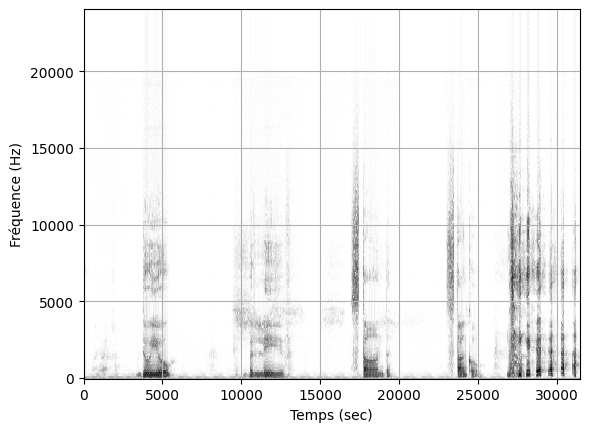

(31468, 512)


In [13]:
from scipy.io.wavfile import read
from IPython.display import Audio,display

#chargement et écoute du fichier audio avec bruit
fs,sgn=read("wavs/zaka.wav")

print(f"Sampling rate: {fs}Hz")
display(Audio(sgn,rate=fs))

#passage au domaine fréquentiel et affichage du spectrograme
T=512
p=16
amp,ph=spectrogram(sgn,T,p)
showspectrogram(amp,fs)
print(amp.shape)
#retour au domaine temporel en utilisant l'amplitude et la phase et écoute du résultat
newsgn=spectrogram2wav(amp,ph,p)
# display(Audio(newsgn,rate=fs))

In [14]:

def Energy(amp):
    print(f'amp  : {amp.shape}')
    e=np.mean(amp**2,axis=1)
    print(f'energy  : {e.shape}')


    return e
def NoiseCancelling(amp,threshold=6,alpha = 1):
    energy = Energy(amp)
    silence = amp[energy<threshold]
    print(f'silence: {silence.shape}')
    silence = np.mean(silence,axis=0)
    print(f'silence mean : {silence.shape}')
    amp = amp -silence*alpha
    amp[amp<0]=0
    return amp


amp  : (31468, 512)
energy  : (31468,)


(array([2.8759e+04, 1.4060e+03, 5.8200e+02, 2.1500e+02, 1.4900e+02,
        1.3100e+02, 5.3000e+01, 7.2000e+01, 7.4000e+01, 2.7000e+01]),
 array([2.34730704e-03, 7.17511411e+02, 1.43502047e+03, 2.15252954e+03,
        2.87003860e+03, 3.58754767e+03, 4.30505673e+03, 5.02256579e+03,
        5.74007486e+03, 6.45758392e+03, 7.17509299e+03]),
 <BarContainer object of 10 artists>)

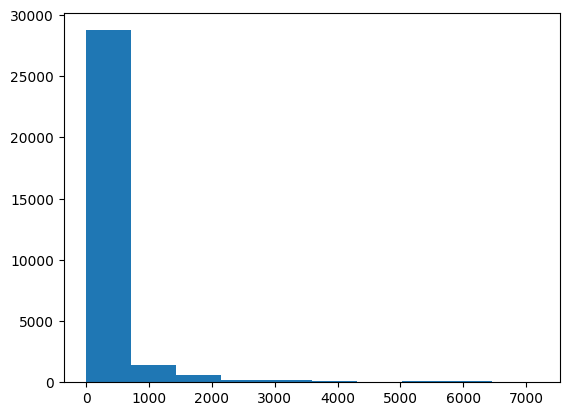

In [15]:
energy = Energy(amp)
# print(f"energy {energy}")
plt.hist(energy)

amp  : (31468, 512)
energy  : (31468,)
silence: (25487, 512)
silence mean : (512,)


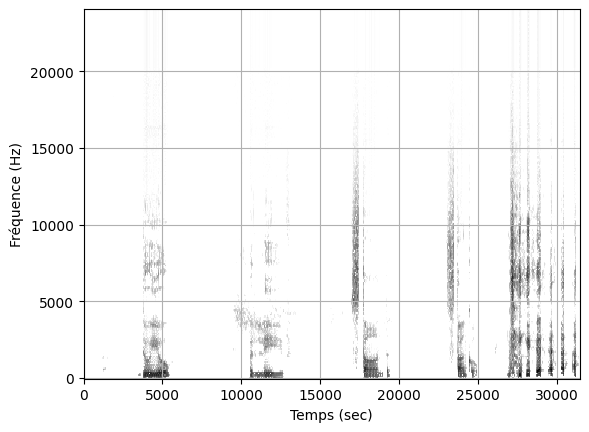

In [16]:
new_sound = NoiseCancelling(amp,threshold=100,alpha=3)
showspectrogram(new_sound,fs)
new_sound=spectrogram2wav(new_sound,ph,p)
display(Audio(new_sound,rate=fs))